In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
item = pd.read_csv('u.item', names=['movie id','movie title' , 'release date' , 'video release date' , 'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,  "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,  'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' , 'Thriller' , 'War' , 'Western' ], sep='|', encoding='latin-1', header=None)
data=pd.read_table('u.data',names=['user id',  'item id',  'rating', 'timestamp'])
user = pd.read_csv('u.user',names=['user id' , 'age' , 'gender' , 'occupation' , 'zip code'], sep='|', encoding='latin-1', header=None)
data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Data Cleaning

#### Data table first

In [3]:
# realising that th etables needs to be joined together so as to have all details in one table
# firstly i'll need to rename the item id column in data to movie id since it's same
data = data.rename(columns={'item id': 'movie id'})
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
def unix_to_datetime(timestamp):
    return datetime.datetime.fromtimestamp(timestamp)

In [6]:
# the timestamp is not in corect shape it needs to be in datetime
data['timestamp'] = data['timestamp'].apply(unix_to_datetime)
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,1997-12-04 16:55:49
1,186,302,3,1998-04-04 20:22:22
2,22,377,1,1997-11-07 08:18:36
3,244,51,2,1997-11-27 06:02:03
4,166,346,1,1998-02-02 06:33:16


#### next to the item table

In [7]:
# checking for item
item.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [8]:
# the release date is not in format, the video relase date is all empty, 
# the column named unknown needs to be fixed out since it has no empty cell, the object need to be fixed.
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
item['movie title'].astype(str)

0                                Toy Story (1995)
1                                GoldenEye (1995)
2                               Four Rooms (1995)
3                               Get Shorty (1995)
4                                  Copycat (1995)
                          ...                    
1677                            Mat' i syn (1997)
1678                             B. Monkey (1998)
1679                         Sliding Doors (1998)
1680                          You So Crazy (1994)
1681    Scream of Stone (Schrei aus Stein) (1991)
Name: movie title, Length: 1682, dtype: object

In [10]:
def extract_title(movie_title):
    return movie_title[:-7]
item['movie title'] =item['movie title'].apply(extract_title)

item['movie title']

0                                Toy Story
1                                GoldenEye
2                               Four Rooms
3                               Get Shorty
4                                  Copycat
                       ...                
1677                            Mat' i syn
1678                             B. Monkey
1679                         Sliding Doors
1680                          You So Crazy
1681    Scream of Stone (Schrei aus Stein)
Name: movie title, Length: 1682, dtype: object

In [11]:
# # Convert the float column to a date column
item['release date'] = pd.to_datetime(item['release date'])
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie id            1682 non-null   int64         
 1   movie title         1682 non-null   object        
 2   release date        1681 non-null   datetime64[ns]
 3   video release date  0 non-null      float64       
 4   IMDb URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

In [12]:
# for the release date i want to turn it to year
item = item.rename(columns={'video release date': 'release year'})
data.head()
item['release year'] = item['release date'].dt.year
item.head()

,movie id,movie title,release date,release year,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995-01-01,1995.0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995-01-01,1995.0,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995-01-01,1995.0,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995-01-01,1995.0,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995-01-01,1995.0,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
item['release year'] = pd.to_datetime(item['release date'],format="%Y")
item['release year'] =item['release year'].dt.strftime('%Y')
item.head()

,movie id,movie title,release date,release year,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995-01-01,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995-01-01,1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995-01-01,1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995-01-01,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995-01-01,1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      1682 non-null   int64         
 1   movie title   1682 non-null   object        
 2   release date  1681 non-null   datetime64[ns]
 3   release year  1681 non-null   object        
 4   IMDb URL      1679 non-null   object        
 5   unknown       1682 non-null   int64         
 6   Action        1682 non-null   int64         
 7   Adventure     1682 non-null   int64         
 8   Animation     1682 non-null   int64         
 9   Children's    1682 non-null   int64         
 10  Comedy        1682 non-null   int64         
 11  Crime         1682 non-null   int64         
 12  Documentary   1682 non-null   int64         
 13  Drama         1682 non-null   int64         
 14  Fantasy       1682 non-null   int64         
 15  Film-Noir     1682 non-null   int64   

In [16]:
# also dropping the unknown column
item.drop('unknown',axis=1, inplace=True)

#### user table

In [121]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
user.head()
user.info()
# user data seems to be alright

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### merging the tables together

In [21]:
userdata=pd.merge(data,user, how="right")

In [22]:
userdata=pd.merge(userdata,item,how='right')

In [24]:
userdata.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie title', 'release date', 'release year',
       'IMDb URL', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

##  univarate analysis

#### Rating

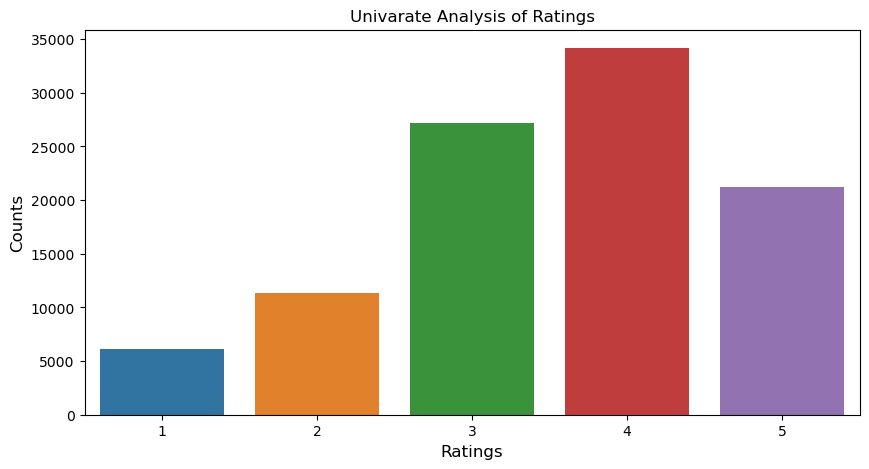

In [122]:
rating=userdata['rating'].value_counts().sort_values(ascending=False)
rating.values
plt.figure(figsize=(10,5))
sns.barplot(x=rating.index,y=rating.values)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Univarate Analysis of Ratings')
# plt.show()
plt.savefig('Univarate Analysis of Ratings.png')

#### age

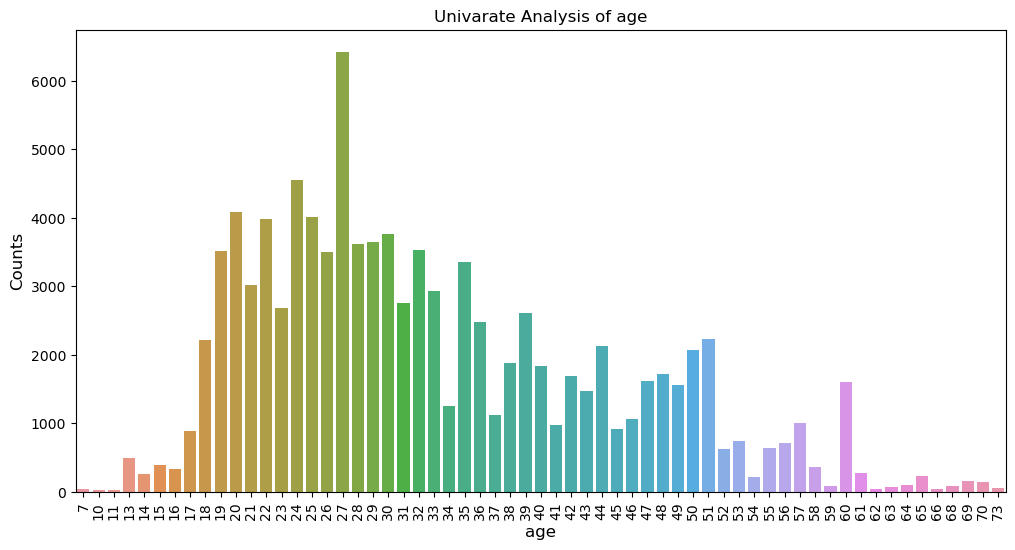

<Figure size 640x480 with 0 Axes>

In [123]:
age=userdata['age'].value_counts().sort_values(ascending=False)
age.values
plt.figure(figsize=(12,6))
sns.barplot(x=age.index,y=age.values)
plt.xlabel('age', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=12)
plt.title('Univarate Analysis of age')
plt.show()


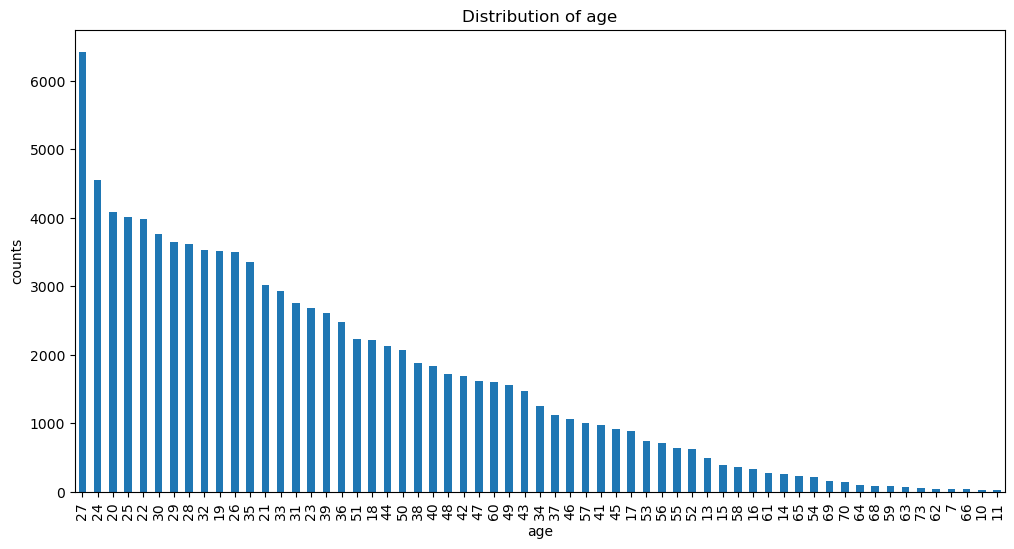

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize=(12,6))
userdata['age'].value_counts().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('age')
plt.ylabel('counts')
plt.title('Distribution of age')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Univarate Analysis of age2.png')

#### Release Date

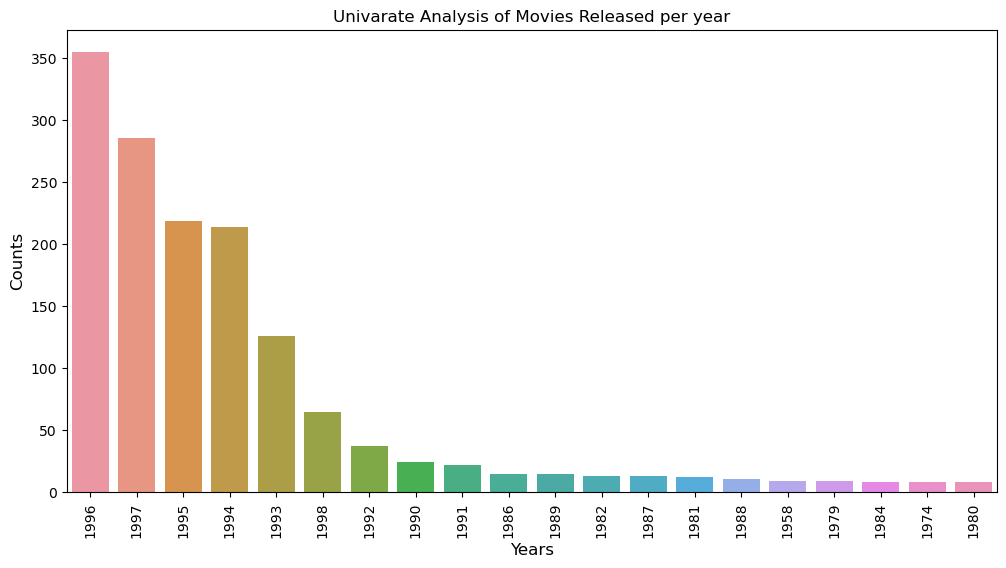

In [132]:
release_date=item['release year'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=release_date.index,y=release_date.values)
plt.xlabel('Years', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=12)
plt.title('Univarate Analysis of Movies Released per year')
# plt.show()



#### Gender

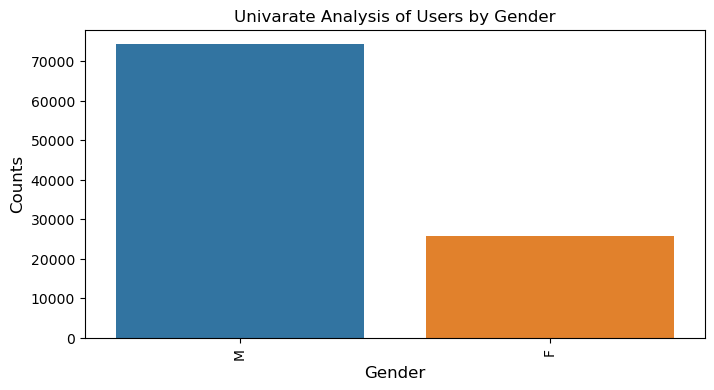

In [131]:
gender=userdata['gender'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=gender.index,y=gender.values)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=12)
plt.title('Univarate Analysis of Users by Gender')
# plt.show()



#### occupation

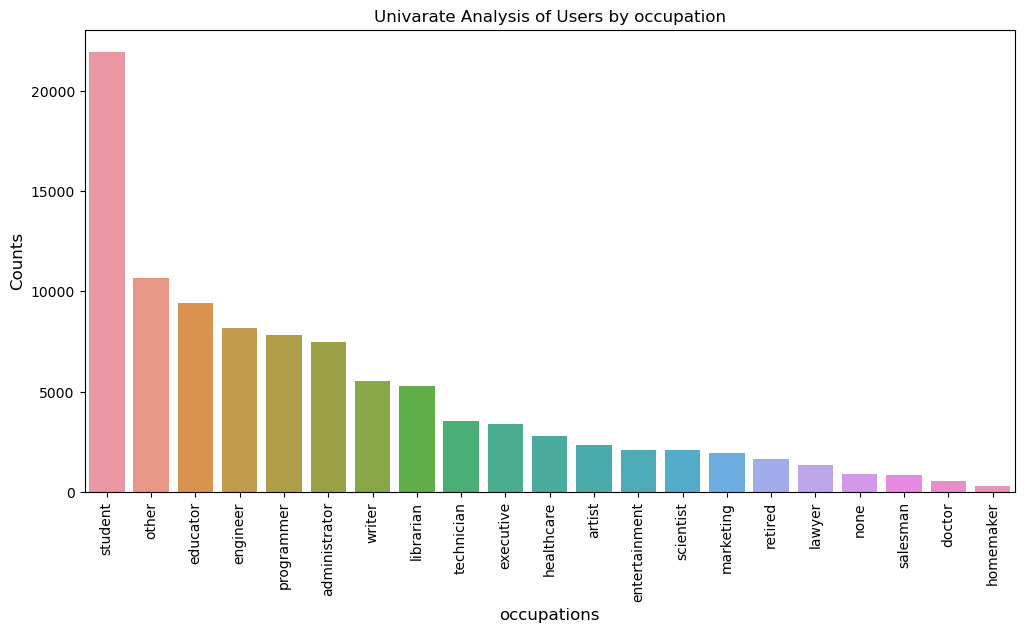

In [130]:
occupation=userdata['occupation'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=occupation.index,y=occupation.values)
plt.xlabel('occupations', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Counts', fontsize=12)
plt.title('Univarate Analysis of Users by occupation')
# plt.show()



#### Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.

C:\Users\OWNER\AppData\Local\Temp\ipykernel_16028\1993232681.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_counts = userdata.groupby('release year').sum().loc[:, 'Action':'Western'].head(30)


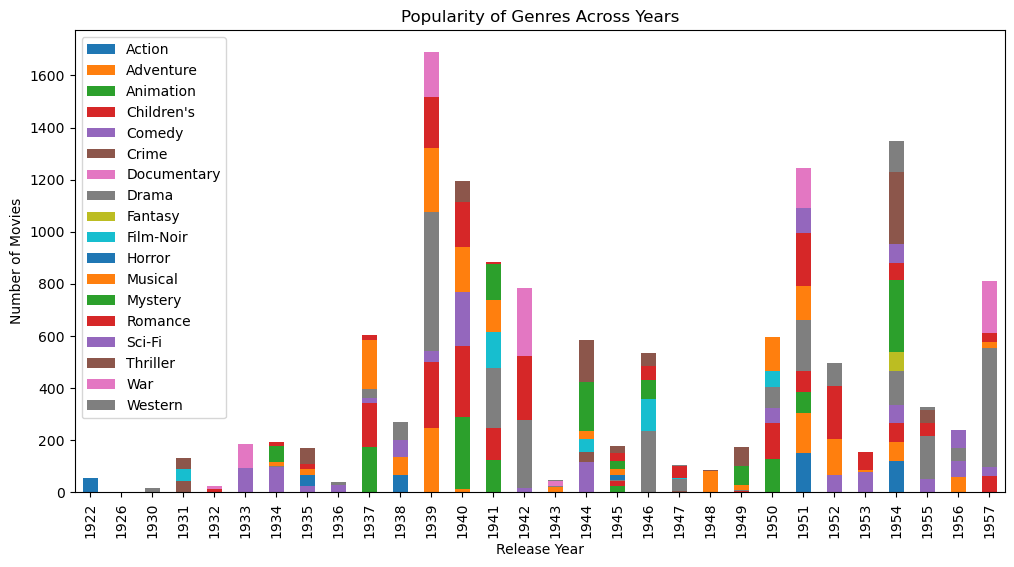

In [129]:
# Group the data by release year and sum the genre columns
genre_counts = userdata.groupby('release year').sum().loc[:, 'Action':'Western'].head(30)
genre_counts

genre_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Popularity of Genres Across Years')


# plt.show()


#### Display the top 25 movies by average rating, as a list/series/dataframe.
#### Note:- Consider only the movies which received atleast a 100 ratings

In [61]:

ratings = userdata.groupby('movie id')['rating'].agg(['count', 'mean'])
ratings

# # Filter the results to only include movies with at least 100 ratings
ratingabove100 = ratings[ratings['count'] >= 100]
ratingabove100


top_movies = ratingabove100.sort_values('mean', ascending=False).head(25)

top_movies


,count,mean
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


#### Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
* Men watch more drama than women
* Men watch more Romance than women
* Women watch more Sci-Fi than men

In [65]:
genre_counts = userdata.groupby(['gender', 'Drama', 'Romance', 'Sci-Fi'])['rating'].count()

# Print the counts for each combination of gender and genre
print(genre_counts)

gender  Drama  Romance  Sci-Fi
F       0      0        0          9638
                        1          1761
               1        0          3009
                        1           324
        1      0        0          8030
                        1           453
               1        0          2434
                        1            91
M       0      0        0         29801
                        1          7461
               1        0          7160
                        1           951
        1      0        0         21982
                        1          1413
               1        0          5216
                        1           276
Name: rating, dtype: int64


In [105]:
# Men watch more drama than women

drama = userdata.groupby(['gender', 'Drama'])['rating'].count()
drama
# when o is considered to be false 1 is true

f_drama=drama.loc['F',1]
m_drama=drama.loc['M',1]
print(f'The total number of female that watch drama {f_drama}, and for male {m_drama}, from our finding men watch drama genre than women')

The total number of female that watch drama 11008, and for male 28887, from our finding men watch drama genre than women


In [108]:
# Men watch more Romance than women
romance = userdata.groupby(['gender', 'Romance'])['rating'].count()
romance
f_romance=romance.loc['F',1]
m_romance=romance.loc['M',1]
print(f'The total number of female that watch drama {f_romance}, and for male {m_romance}, from our finding men watch romance genre than women')

The total number of female that watch drama 5858, and for male 13603, from our finding men watch romance genre than women


In [110]:
# Women watch more Sci-Fi than men
sci_fi = userdata.groupby(['gender', 'Sci-Fi'])['rating'].count()
sci_fi
f_sci_fi=sci_fi.loc['F',1]
m_sci_fi=sci_fi.loc['M',1]
print(f'The total number of female that watch drama {f_sci_fi}, and for male {m_sci_fi}, from our finding men watch Science Fictional genre than women')

The total number of female that watch drama 2629, and for male 10101, from our finding men watch Science Fictional movie than women


In [113]:
genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
userdata['genre'] =userdata[genre_columns].apply(lambda x: '|'.join(x.index[x == 1]), axis=1)
userdata

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre
0,1,1,5,1997-09-22 23:02:38,24,M,technician,85711,Toy Story,1995-01-01,...,0,0,0,0,0,0,0,0,0,Animation|Children's|Comedy
1,2,1,4,1998-02-27 04:41:11,53,F,other,94043,Toy Story,1995-01-01,...,0,0,0,0,0,0,0,0,0,Animation|Children's|Comedy
2,5,1,4,1997-09-30 17:09:08,33,F,other,15213,Toy Story,1995-01-01,...,0,0,0,0,0,0,0,0,0,Animation|Children's|Comedy
3,6,1,4,1997-12-31 21:17:58,42,M,executive,98101,Toy Story,1995-01-01,...,0,0,0,0,0,0,0,0,0,Animation|Children's|Comedy
4,10,1,4,1997-10-26 19:01:17,53,M,lawyer,90703,Toy Story,1995-01-01,...,0,0,0,0,0,0,0,0,0,Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1678,1,1998-03-07 17:52:50,17,M,student,60089,Mat' i syn,1998-02-06,...,0,0,0,0,0,0,0,0,0,Drama
99996,863,1679,3,1998-03-07 17:51:31,17,M,student,60089,B. Monkey,1998-02-06,...,0,0,0,0,1,0,1,0,0,Romance|Thriller
99997,863,1680,2,1998-03-07 17:52:50,17,M,student,60089,Sliding Doors,1998-01-01,...,0,0,0,0,1,0,0,0,0,Drama|Romance
99998,896,1681,3,1998-02-11 02:32:02,28,M,writer,91505,You So Crazy,1994-01-01,...,0,0,0,0,0,0,0,0,0,Comedy


In [118]:
# addin all the genre togeter for each movie
userdata['genre'].unique()

array(["Animation|Children's|Comedy", 'Action|Adventure|Thriller',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller', 'Drama',
       'Drama|Sci-Fi', "Children's|Comedy|Drama", 'Drama|War',
       'Crime|Thriller', 'Comedy', 'Drama|Romance', 'Comedy|Romance',
       'Action|Comedy|Crime|Horror|Thriller',
       'Action|Adventure|Comedy|Musical|Thriller', 'Action|Drama|War',
       'Drama|Thriller', 'Action|Adventure|Crime', 'Action',
       'Action|Drama|Thriller', 'Action|Adventure|Comedy|Crime',
       'Drama|Thriller|War', 'Documentary', 'Action|Romance|Thriller',
       'Comedy|Drama', "Adventure|Children's|Drama", 'Sci-Fi|Thriller',
       'Action|Crime|Sci-Fi', 'Action|Adventure|Romance|Sci-Fi|War',
       'Drama|Romance|War|Western', 'Action|Thriller',
       'Crime|Drama|Romance|Thriller', 'Crime|Drama',
       'Action|Adventure|Sci-Fi', "Children's|Comedy",
       'Comedy|Romance|War', "Animation|Children's|Musical",
       'Comedy|Crime|Fantasy', 'Action|Comedy